In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [2]:
e=requests.get("https://www.tcmb.gov.tr/wps/wcm/connect/TR/TCMB+TR/Main+Menu/Istatistikler/Enflasyon+Verileri/Tuketici+Fiyatlari")
source_e=BeautifulSoup(e.content,"html.parser")
source_e.title

<title>TCMB - Tüketici Fiyatları</title>

In [3]:
tablolar=source_e.find("tbody")
veri=tablolar.find_all("tr")

aylık=[]
yıllık=[]
tarih=[]

for i in veri:
    tarih.append(i.find_all("td")[0].text)
    yıllık.append(i.find_all("td")[1].text)
    aylık.append(i.find_all("td")[2].text)
    
enflasyon={"Tarih":tarih,"Yıllık TÜFE":yıllık,"Aylık TÜFE":aylık}
df_e=pd.DataFrame(enflasyon)
df_e.to_excel("12 yıllık enflasyon.xlsx")

In [4]:
df_e.head()

,Tarih,Yıllık TÜFE,Aylık TÜFE
0,01-2024,64.86,6.70
1,12-2023,64.77,2.93
2,11-2023,61.98,3.28
3,10-2023,61.36,3.43
4,09-2023,61.53,4.75


In [5]:
#hisse verileri çekme.

In [6]:
import yfinance as yf

C:\Users\onur_\anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [7]:
thyao= yf.download("THYAO.IS","2005-01-01","2023-12-31", interval='1mo')
thyao.to_excel("THYAO.IS 12 yıllık.xlsx")


[*********************100%%**********************]  1 of 1 completed


In [9]:
bist100=yf.download("XU100.IS","2005-01-01","2023-12-31", interval='1mo')
bist100.to_excel("XU100.IS 12 yıllık.xlsx")

[*********************100%%**********************]  1 of 1 completed


In [11]:
dolar=yf.download("TRY=X","2005-01-01","2023-12-31", interval='1mo')
dolar.to_excel("Dolar 12 yıllık.xlsx")

[*********************100%%**********************]  1 of 1 completed


In [12]:
bist=pd.read_excel("XU100.IS 12 yıllık.xlsx")
bist=bist.round(3).drop(0)
bist.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1,2005-02-01,27330.400,28409.5,26403.801,28396.199,28396.199,5888983600
2,2005-03-01,28396.199,28400.0,23874.699,25557.801,25557.801,4905866300
3,2005-04-01,25557.801,26229.0,22887.900,23591.600,23591.600,3873826400
4,2005-05-01,23591.600,25633.5,23591.600,25236.500,25236.500,4275624900
5,2005-06-01,25236.500,27417.9,25081.400,26957.301,26957.301,4120207400


In [13]:
thy=pd.read_excel("THYAO.IS 12 yıllık.xlsx")
thy=thy.round(3).drop(0)
thy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1,2005-02-01,0.964,0.970,0.888,0.938,0.865,137200367
2,2005-03-01,0.932,0.951,0.780,0.805,0.742,170937923
3,2005-04-01,0.837,0.850,0.659,0.666,0.614,90457689
4,2005-05-01,0.710,0.818,0.678,0.805,0.742,123697411
5,2005-06-01,0.818,0.995,0.805,0.945,0.871,126201054


In [14]:
usd=pd.read_excel("Dolar 12 yıllık.xlsx")
usd=usd.round(3)
usd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-02-01,1.327,1.340,1.271,1.278,1.278,0
1,2005-03-01,1.271,1.391,1.243,1.349,1.349,0
2,2005-04-01,1.340,1.395,1.319,1.382,1.382,0
3,2005-05-01,1.384,1.387,1.338,1.357,1.357,0
4,2005-06-01,1.354,1.379,1.327,1.327,1.327,0


In [15]:
enf=pd.read_excel("12 yıllık enflasyon.xlsx")
enf=enf.drop(columns={"Unnamed: 0","Tarih"},axis=1)[::-1].drop(0).reset_index(drop=True)
enf.head()

,Yıllık TÜFE,Aylık TÜFE
0,9.24,0.55
1,8.69,0.02
2,7.94,0.26
3,8.18,0.71
4,8.70,0.92


In [16]:
usd=usd.drop(columns={"Open","High","Low","Adj Close","Volume"},axis=1).rename(columns={"Close":"USD_Kapanış"})

bist=bist.drop(columns={"Open","High","Low","Adj Close"},axis=1).rename(columns={
"Close":"BIST_Kapanış","Volume":"BIST_Hacim"})

thy=thy.drop(columns={"Open","High","Low","Adj Close"},axis=1).rename(columns={
"Close":"THY_Kapanış","Volume":"THY_Hacim"})

In [17]:
usd_bist=pd.merge(usd,bist,on="Date")
usd_bist_thy=pd.merge(usd_bist,thy,on="Date")
usd_bist_thy_enf=pd.concat([usd_bist_thy,enf],axis=1)
usd_bist_thy_enf.to_excel("Hisse Tahmin Final Verisi.xlsx")

In [18]:
usd_bist_thy_enf.head()

,Date,USD_Kapanış,BIST_Kapanış,BIST_Hacim,THY_Kapanış,THY_Hacim,Yıllık TÜFE,Aylık TÜFE
0,2005-02-01,1.278,28396.199,5.888984e+09,0.938,137200367.0,9.24,0.55
1,2005-03-01,1.349,25557.801,4.905866e+09,0.805,170937923.0,8.69,0.02
2,2005-04-01,1.382,23591.600,3.873826e+09,0.666,90457689.0,7.94,0.26
3,2005-05-01,1.357,25236.500,4.275625e+09,0.805,123697411.0,8.18,0.71
4,2005-06-01,1.327,26957.301,4.120207e+09,0.945,126201054.0,8.70,0.92


In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
from sklearn.preprocessing import MinMaxScaler


In [22]:
data=usd_bist_thy_enf
data.fillna(method='ffill', inplace=True)
X=data.drop(columns="Date")
y=data["THY_Kapanış"]

C:\Users\onur_\AppData\Local\Temp\ipykernel_1064\3334065168.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  kor=data.corr()


<Axes: >

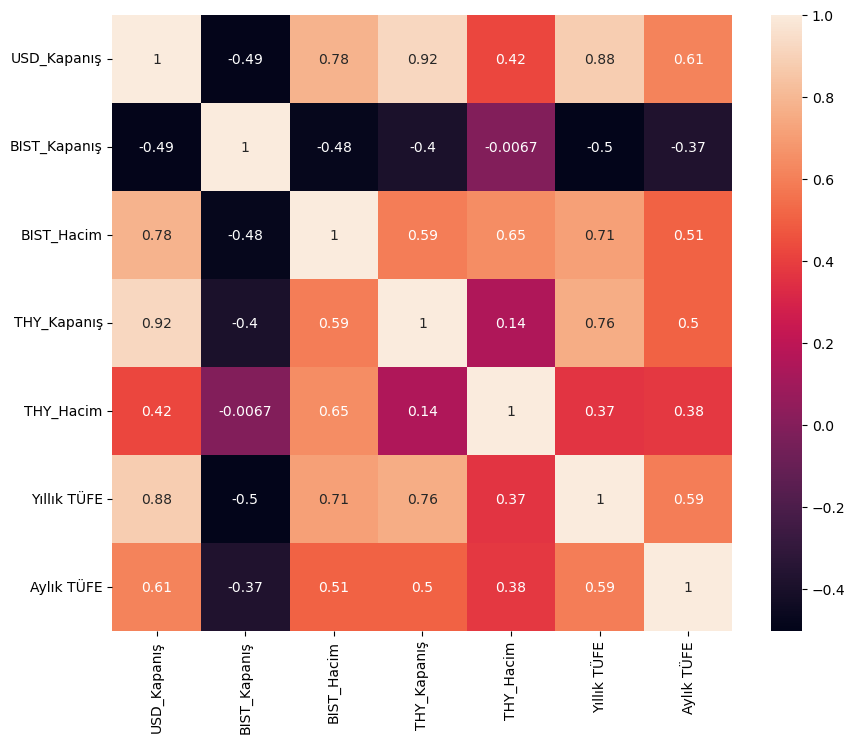

In [23]:
import seaborn as sns

kor=data.corr()
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(kor,annot=True,ax=ax)

0:	learn: 41.8950462	total: 151ms	remaining: 2m 30s
100:	learn: 1.2728521	total: 218ms	remaining: 1.94s
200:	learn: 0.4673127	total: 286ms	remaining: 1.14s
300:	learn: 0.2372123	total: 354ms	remaining: 823ms
400:	learn: 0.1379338	total: 418ms	remaining: 625ms
500:	learn: 0.0863858	total: 494ms	remaining: 492ms
600:	learn: 0.0526124	total: 590ms	remaining: 392ms
700:	learn: 0.0356259	total: 655ms	remaining: 279ms
800:	learn: 0.0229432	total: 715ms	remaining: 178ms
900:	learn: 0.0146644	total: 776ms	remaining: 85.3ms
999:	learn: 0.0096389	total: 860ms	remaining: 0us
Eğitim RMSE: 0.00963899627272376
Test RMSE: 6.672542272411765


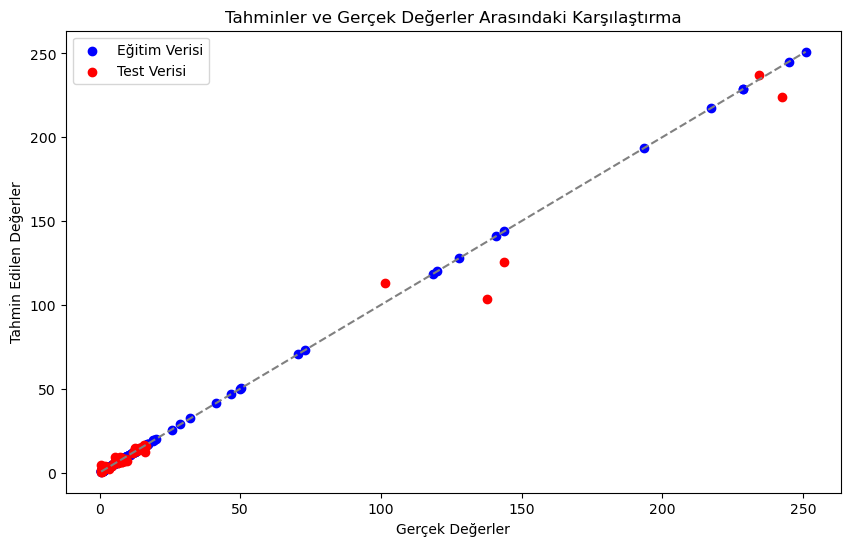

In [24]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

data=usd_bist_thy_enf
data.fillna(method='ffill', inplace=True)
X=data.drop(columns={"Date","THY_Kapanış"})
y=data["THY_Kapanış"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2
                                                ,random_state=42)

model = CatBoostRegressor(
    n_estimators=1000,  # Ağaç sayısı
    learning_rate=0.1,  # Öğrenme oranı
    max_depth=6         # Ağaçların maksimum derinliği
)

model.fit(X_train,y_train,verbose=100)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
train_rmse = mean_squared_error(y_train, train_pred, squared=False)
test_rmse = mean_squared_error(y_test, test_pred, squared=False)


print("Eğitim RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_pred, color='blue', label='Eğitim Verisi')
plt.scatter(y_test, test_pred, color='red', label='Test Verisi')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='gray')
plt.title('Tahminler ve Gerçek Değerler Arasındaki Karşılaştırma')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.legend()
plt.show()


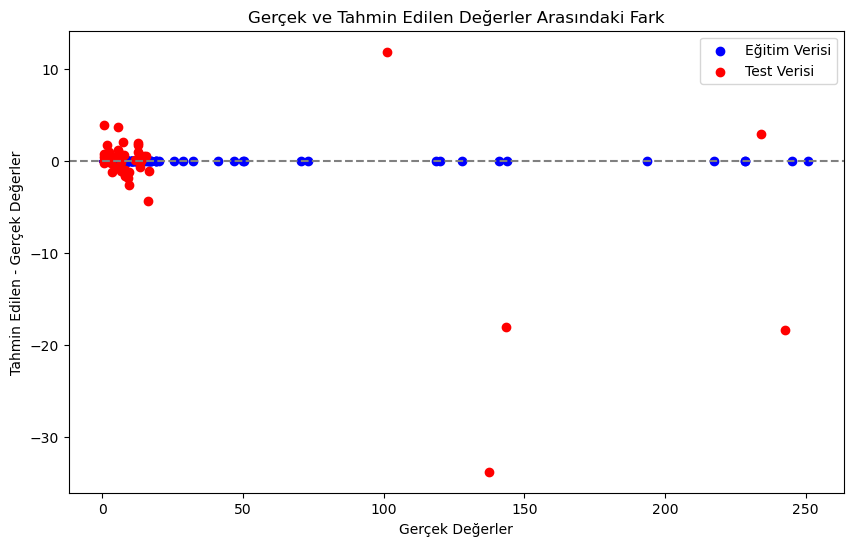

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_pred - y_train, color='blue', label='Eğitim Verisi')
plt.scatter(y_test, test_pred - y_test, color='red', label='Test Verisi')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Gerçek ve Tahmin Edilen Değerler Arasındaki Fark')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen - Gerçek Değerler')
plt.legend()
plt.show()